In [1]:
import numpy

samples = [1, 4, 5, 7, 321, 31, 32, 53, 21]
tmp_y = [1] * len(samples)

tmp_y

[1, 1, 1, 1, 1, 1, 1, 1, 1]

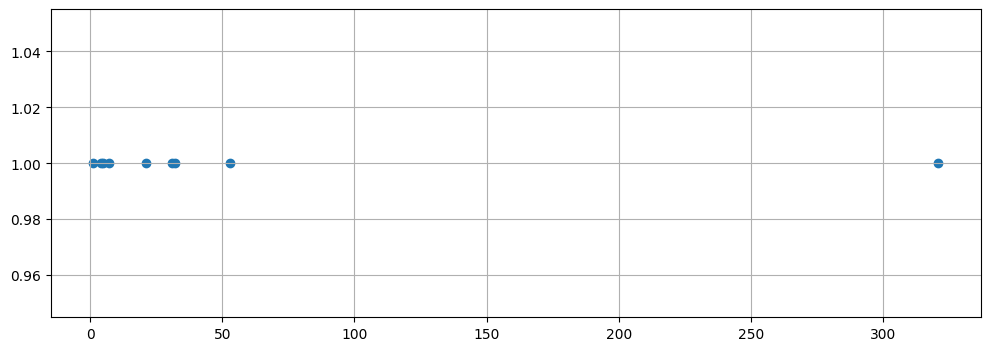

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))
plt.scatter(samples, tmp_y)
plt.grid()
plt.show()

In [3]:
np.median(samples)

NameError: name 'np' is not defined

In [4]:
import numpy as np

In [5]:
np.median(samples)

np.float64(21.0)

In [6]:
np.percentile(samples, 25)

np.float64(5.0)

In [7]:
np.percentile(samples,75)

np.float64(32.0)

In [8]:
np.percentile(samples, 75) - np.percentile(samples, 25)

np.float64(27.0)

In [9]:
iqr = np.percentile(samples, 75) - np.percentile(samples, 25)
iqr * 1.5

np.float64(40.5)

In [10]:
q1 = np.percentile(samples, 25)
q2 = np.median(samples)
q3 = np.percentile(samples, 75)
upper_fence = q3 + iqr * 1.5
lower_fence = q1 - iqr * 1.5

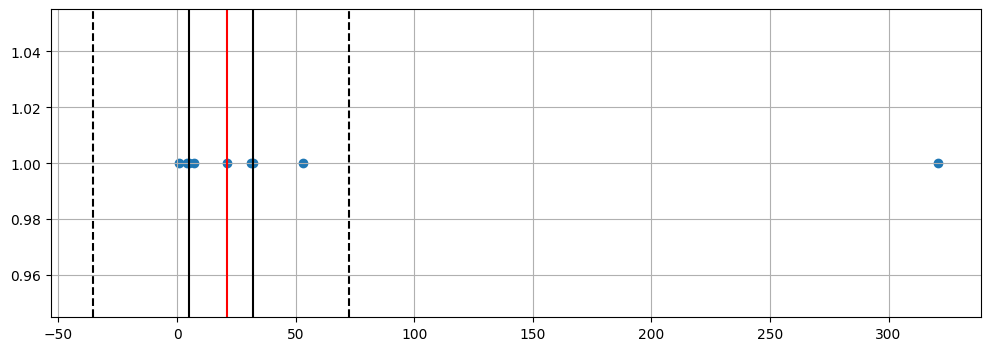

In [11]:
plt.figure(figsize = (12, 4))
plt.scatter(samples, tmp_y)
plt.axvline(x=q1, color = 'black')
plt.axvline(x=q2, color = 'red')
plt.axvline(x=q3, color = 'black')
plt.axvline(x=upper_fence, color = 'black', ls = 'dashed')
plt.axvline(x=lower_fence, color = 'black', ls = 'dashed')
plt.grid()
plt.show()

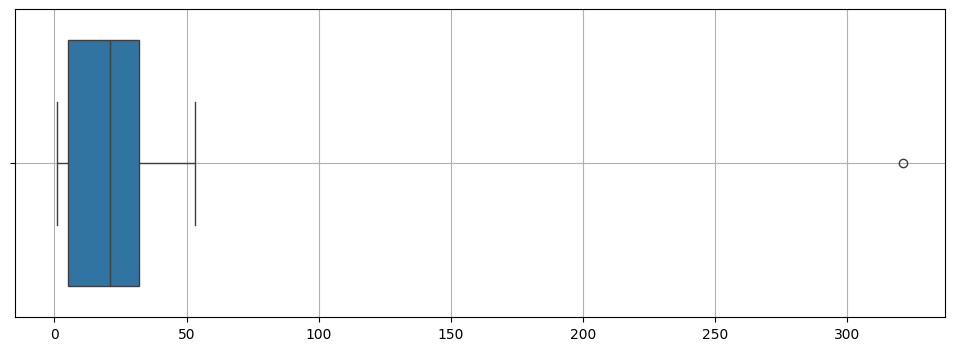

In [15]:
import seaborn as sns
plt.figure(figsize = (12, 4))
sns.boxplot(samples, orient = "h")
plt.grid()
plt.show()

In [16]:
import pandas as pd

df = pd.DataFrame({
    'A' : ['a', 'b', 'c', 'a', 'b'],
    'B' : [1, 2, 3, 1, 0]
})
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [18]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [19]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [20]:
le.transform(['a', 'b'])

array([0, 1])

In [21]:
le.fit_transform(df["A"])

array([0, 1, 2, 0, 1])

In [22]:
le.inverse_transform([1, 2, 2, 2])

array(['b', 'c', 'c', 'c'], dtype=object)

In [23]:
df = pd.DataFrame({
    'A' : [10, 20, -10, 0, 25],
    'B' : [1, 2, 3, 1, 0]
})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [24]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [25]:
mms.data_max_, mms.data_min_

(array([25.,  3.]), array([-10.,   0.]))

In [26]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [27]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [28]:
mms.fit_transform(df_mms)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [29]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [31]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [32]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [33]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [34]:
df = pd.DataFrame({
    'A' : [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [36]:
df_scaler = df.copy()

In [37]:
df_scaler["MinMax"] = mm.fit_transform(df)
df_scaler["Standard"] = ss.fit_transform(df)
df_scaler["Robust"] = rs.fit_transform(df)
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


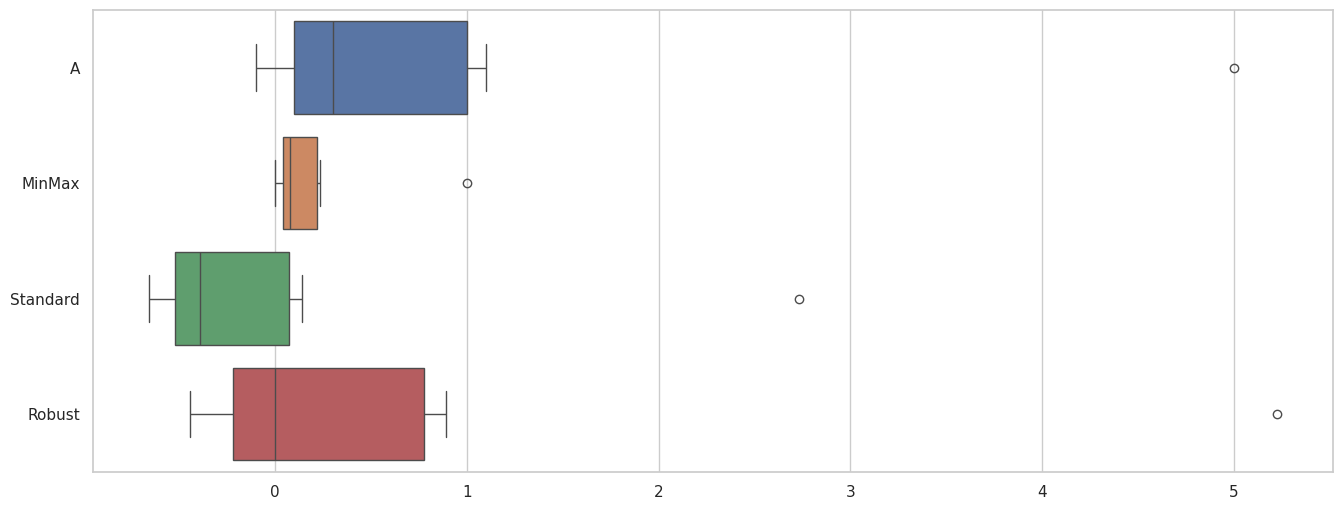

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (16, 6))
sns.boxplot(data = df_scaler, orient = "h");